In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
import os
from IPython.display import Image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from pathlib import Path
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import preprocess_input
from glob2 import glob

trail 1 
using vgg16 i build a basic model and got a accuracy of 50 percent.


In [ ]:
IMAGE_SIZE=[224,224]

In [ ]:
vgg = VGG16(input_shape= IMAGE_SIZE + [3],weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/univ.ai2_project/test_another*')

In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
x = Flatten()(vgg.output)

In [ ]:
from tensorflow.keras.models import Model
prediction = Dense(1,activation='sigmoid')(x)
model = Model(inputs= vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/univ.ai2_project/test_another',target_size=(224,224),batch_size=32,class_mode='binary')

Found 8728 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'damage': 0, 'no_damage': 1}

In [ ]:

valid_set = test_datagen.flow_from_directory('/content/drive/MyDrive/univ.ai2_project/test_another',target_size=(224,224),batch_size=32,class_mode='binary')

Found 8728 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/univ.ai2_project/test',target_size=(224,224),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(training_set,validation_data=valid_set,epochs=3,steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/3
313/313 [==============================] - 1631s 5s/step - loss: 0.2650 - accuracy: 0.5000 - val_loss: 0.2083 - val_accuracy: 0.5000
Epoch 2/3
313/313 [==============================] - 176s 562ms/step - loss: 0.2004 - accuracy: 0.5000 - val_loss: 0.1765 - val_accuracy: 0.5000
Epoch 3/3
313/313 [==============================] - 177s 565ms/step - loss: 0.1753 - accuracy: 0.5000 - val_loss: 0.1700 - val_accuracy: 0.5000


vvg model with data augmentation  and good accuracy rate.
but data augmentation code was taken from online.

In [ ]:
input_path = '/content/drive/MyDrive/univ.ai2_project//'

def print_file_sizes(input_path, subset):
    print('{}:'.format(subset))
    print('')
    path = input_path + subset + '/'
    for f in os.listdir(path):
        if not os.path.isdir(path + f):
            print(f.ljust(30) + str(round(os.path.getsize(path + f) / 1000000, 2)) + 'MB')
        else:
            sizes = [os.path.getsize(path+f+'/'+x)/1000000 for x in os.listdir(path + f)]
            print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))
    print('')
    
print_file_sizes(input_path, 'train_another')
print_file_sizes(input_path, 'validation_another')
print_file_sizes(input_path, 'test_another')
print_file_sizes(input_path, 'test')

train_another:

.DS_Store                     0.01MB
damage                        12.56MB (5000 files)
no_damage                     15.07MB (5000 files)

validation_another:

damage                        2.52MB (1000 files)
no_damage                     3.02MB (1000 files)

test_another:

damage                        19.35MB (7728 files)
no_damage                     3.01MB (1000 files)

test:

.DS_Store                     0.01MB
damage                        2.53MB (1000 files)
no_damage                     2.99MB (1000 files)



In [ ]:
image_df = pd.DataFrame({'path': list(Path(input_path).glob('**/*.jp*g'))})

image_df['damage'] = image_df['path'].map(lambda x: x.parent.stem)
image_df['data_split'] = image_df['path'].map(lambda x: x.parent.parent.stem)
image_df['location'] = image_df['path'].map(lambda x: x.stem)
image_df['lon'] = image_df['location'].map(lambda x: float(x.split('_')[0]))
image_df['lat'] = image_df['location'].map(lambda x: float(x.split('_')[0]))
image_df['path'] = image_df['path'].map(lambda x: str(x)) # convert the path back to a string

image_df.head()

,path,damage,data_split,location,lon,lat
0,/content/drive/MyDrive/univ.ai2_project/old/te...,damage,test_another,-95.06581899999999_29.811885999999998,-95.065819,-95.065819
1,/content/drive/MyDrive/univ.ai2_project/old/te...,damage,test_another,-95.065969_29.812609000000002,-95.065969,-95.065969
2,/content/drive/MyDrive/univ.ai2_project/old/te...,damage,test_another,-95.06604899999999_29.831622999999997,-95.066049,-95.066049
3,/content/drive/MyDrive/univ.ai2_project/old/te...,damage,test_another,-95.066323_29.809571999999996,-95.066323,-95.066323
4,/content/drive/MyDrive/univ.ai2_project/old/te...,damage,test_another,-95.066283_29.792195,-95.066283,-95.066283


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
import cv2

# read it in unchanged, to make sure we aren't losing any information
img = cv2.imread(image_df['path'][0], cv2.IMREAD_UNCHANGED)
np.shape(img)

(128, 128, 3)

In [ ]:
type(img[0,0,0])

numpy.uint8

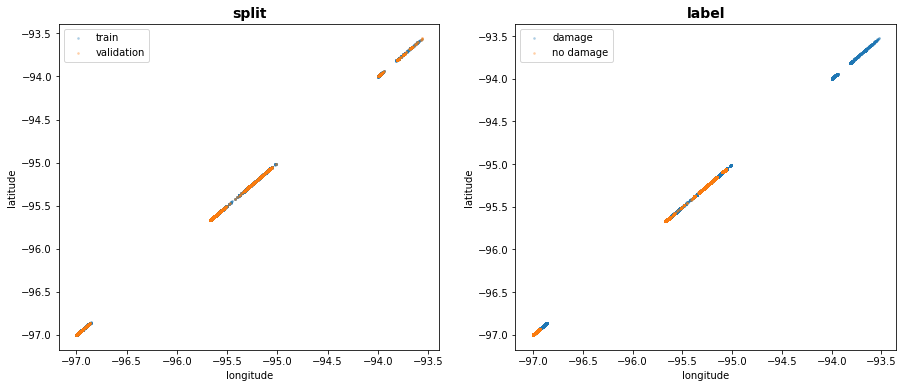

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

s = 3
alpha = 0.25

# get the train-validation-test splits
image_df_train = image_df[image_df['data_split']=='train_another'].copy()
image_df_val = image_df[image_df['data_split']=='validation_another'].copy()
image_df_test = image_df[image_df['data_split']=='test_another'].copy()

# sort to ensure reproducible behaviour
image_df_train.sort_values('lat', inplace=True)
image_df_val.sort_values('lat', inplace=True)
image_df_test.sort_values('lat', inplace=True)
image_df_train.reset_index(drop=True,inplace=True)
image_df_val.reset_index(drop=True,inplace=True)
image_df_test.reset_index(drop=True,inplace=True)

ax[0].scatter(image_df_train['lon'], image_df_train['lat'], color='C0', s=s, alpha=alpha, label='train')
ax[0].scatter(image_df_val['lon'], image_df_val['lat'], color='C1', s=s, alpha=alpha, label='validation')

ax[0].set_title('split', fontsize=14, fontweight='bold')
ax[0].legend()
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')

image_df_dmg = image_df[image_df['damage']=='damage'].copy()
image_df_nodmg = image_df[image_df['damage']=='no_damage'].copy()

image_df_dmg.reset_index(drop=True,inplace=True)
image_df_nodmg.reset_index(drop=True,inplace=True)

ax[1].scatter(image_df_dmg['lon'], image_df_dmg['lat'], color='C0', s=s, alpha=alpha, label='damage')
ax[1].scatter(image_df_nodmg['lon'], image_df_nodmg['lat'], color='C1', s=s, alpha=alpha, label='no damage')

ax[1].set_title('label', fontsize=14, fontweight='bold')
ax[1].legend()
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')

plt.show(fig)

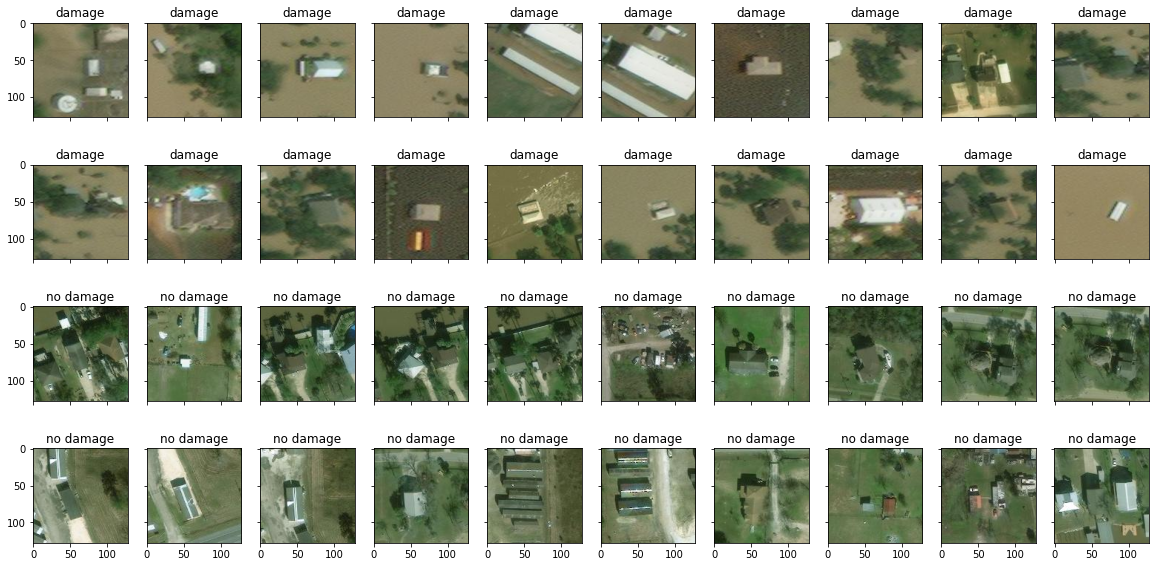

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=10, sharex=True, sharey=True, figsize=(20,10))

ax = ax.flatten()

for i in range(20):
    img = cv2.imread(image_df_dmg['path'][i], cv2.IMREAD_UNCHANGED)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_title('damage')
    
for i in range(20,40):
    img = cv2.imread(image_df_nodmg['path'][i], cv2.IMREAD_UNCHANGED)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_title('no damage')
    
plt.show()

In [ ]:
train_path = image_df_train['path'].copy().values 
val_path = image_df_val['path'].copy().values
test_path = image_df_test['path'].copy().values

# labels damage = 1
train_labels = np.zeros(len(image_df_train), dtype=np.int8)
train_labels[image_df_train['damage'].values=='damage'] = 1

val_labels = np.zeros(len(image_df_val), dtype=np.int8)
val_labels[image_df_val['damage'].values=='damage'] = 1

test_labels = np.zeros(len(image_df_test), dtype=np.int8)
test_labels[image_df_test['damage'].values=='damage'] = 1

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_path, train_labels)) # path ve label bilg birleştirir
val_ds = tf.data.Dataset.from_tensor_slices((val_path, val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_path, test_labels))

# note that the `numpy()` function is required to grab the actual values from the Dataset
for path, label in train_ds.take(5):
    print("path  : ", path.numpy().decode('utf-8'))
    print("label : ", label.numpy())

path  :  /content/drive/MyDrive/univ.ai2_project/old/train_another/no_damage/-97.001979_28.623572999999997.jpeg
label :  0
path  :  /content/drive/MyDrive/univ.ai2_project/train_another/no_damage/-97.001979_28.623572999999997.jpeg
label :  0
path  :  /content/drive/MyDrive/univ.ai2_project/old/train_another/damage/-97.001677_28.864984000000003.jpeg
label :  1
path  :  /content/drive/MyDrive/univ.ai2_project/train_another/no_damage/-97.001677_28.864984000000003.jpeg
label :  0
path  :  /content/drive/MyDrive/univ.ai2_project/train_another/damage/-97.001677_28.864984000000003.jpeg
label :  1


In [ ]:
def cv2_imread(path, label):
    # read in the image, getting the string of the path via eager execution
    img = cv2.imread(path.numpy().decode('utf-8'), cv2.IMREAD_UNCHANGED)
    # change from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img, label

# this function assumes that the image has been read in, and does some transformations on it
# note that only tensorflow functions are used here
def tf_cleanup(img, label):
    # convert to Tensor
    img = tf.convert_to_tensor(img)
    # unclear why, but the jpeg is read in as uint16 - convert to uint8
    img = tf.dtypes.cast(img, tf.uint8)
    # set the shape of the Tensor
    img.set_shape((128, 128, 3))
    # convert to float32, scaling from uint8 (0-255) to float32 (0-1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image
    img = tf.image.resize(img, [128, 128])
    # convert the labels into a Tensor and set the shape
    label = tf.convert_to_tensor(label)
    label.set_shape(())
    return img, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

# map the cv2 wrapper function using `tf.py_function`
train_ds = train_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                        num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                    num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                      num_parallel_calls=AUTOTUNE)

# map the TensorFlow transformation function - no need to wrap
train_ds = train_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)

In [ ]:
def rotate_augmentation(img, label):
    # rotate 0, 90, 180, or 270 degrees with 25% probability for each
    img = tf.image.rot90(img, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32, seed=1111))
    return img, label

def flip_augmentation(img, label):
    # flip with 50% probability for left-right and up-down
    img = tf.image.random_flip_left_right(img, seed=2222)
    img = tf.image.random_flip_up_down(img, seed=3333)
    return img, label

# map the augmentations, creating a new Dataset
augmented_train_ds = train_ds.map(rotate_augmentation, num_parallel_calls=AUTOTUNE)
augmented_train_ds = augmented_train_ds.map(flip_augmentation, num_parallel_calls=AUTOTUNE)

augmented_val_ds = val_ds.map(rotate_augmentation, num_parallel_calls=AUTOTUNE)
augmented_val_ds = augmented_val_ds.map(flip_augmentation, num_parallel_calls=AUTOTUNE)

# concatenate the augmented and original datasets
train_ds = train_ds.concatenate(augmented_train_ds)
val_ds = val_ds.concatenate(augmented_val_ds)

In [ ]:
def rotate_augmentation(img, label):
    # rotate 0, 90, 180, or 270 degrees with 25% probability for each
    img = tf.image.rot90(img, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32, seed=1111))
    return img, label

def flip_augmentation(img, label):
    # flip with 50% probability for left-right and up-down
    img = tf.image.random_flip_left_right(img, seed=2222)
    img = tf.image.random_flip_up_down(img, seed=3333)
    return img, label

# map the augmentations, creating a new Dataset
augmented_train_ds = train_ds.map(rotate_augmentation, num_parallel_calls=AUTOTUNE)
augmented_train_ds = augmented_train_ds.map(flip_augmentation, num_parallel_calls=AUTOTUNE)

augmented_val_ds = val_ds.map(rotate_augmentation, num_parallel_calls=AUTOTUNE)
augmented_val_ds = augmented_val_ds.map(flip_augmentation, num_parallel_calls=AUTOTUNE)

# concatenate the augmented and original datasets
train_ds = train_ds.concatenate(augmented_train_ds)
val_ds = val_ds.concatenate(augmented_val_ds)

In [ ]:
# double the number of samples in the training and validation splits, due to our augmentation procedure
n_train = len(train_labels)*2
n_val = len(val_labels)*2
n_test = len(test_labels)

# shuffle over the entire dataset, seeding the shuffling for reproducible results
train_ds = train_ds.shuffle(n_train, seed=208, reshuffle_each_iteration=True)
val_ds = val_ds.shuffle(n_val, seed=208, reshuffle_each_iteration=True)
test_ds = test_ds.shuffle(n_test, seed=208, reshuffle_each_iteration=True)

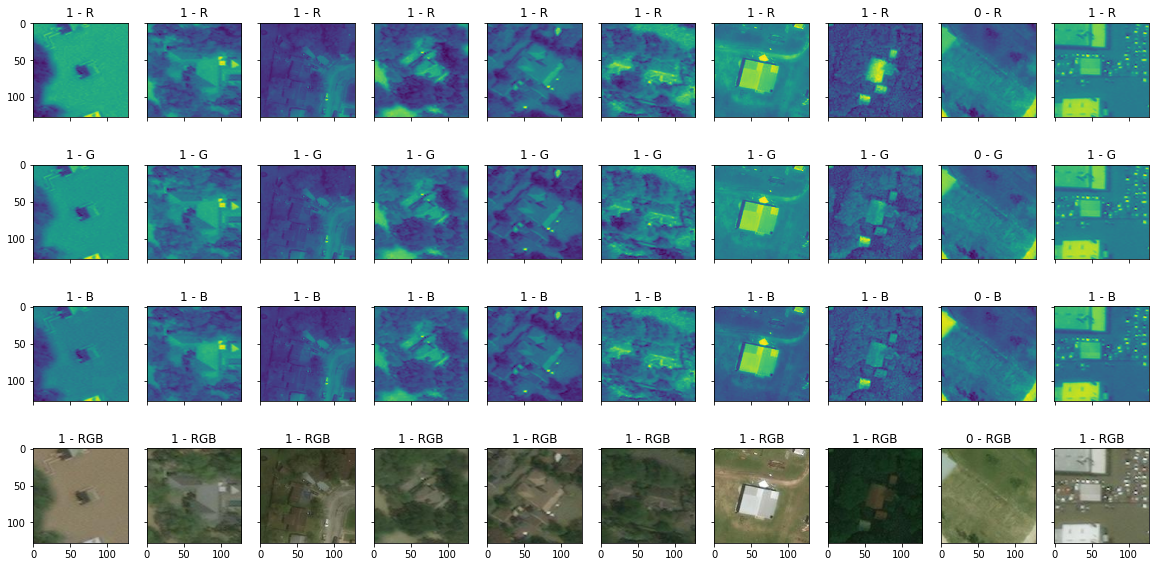

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=10, sharex=True, sharey=True, figsize=(20,10))

i = 0

for image, label in train_ds.take(10):
    ax[0,i].imshow(image[:,:,0])
    ax[0,i].set_title('{} - {}'.format(label.numpy(), 'R'))
    ax[1,i].imshow(image[:,:,1])
    ax[1,i].set_title('{} - {}'.format(label.numpy(), 'G'))
    ax[2,i].imshow(image[:,:,2])
    ax[2,i].set_title('{} - {}'.format(label.numpy(), 'B'))
    ax[3,i].imshow(image)
    ax[3,i].set_title('{} - {}'.format(label.numpy(), 'RGB'))
    
    i = i+1

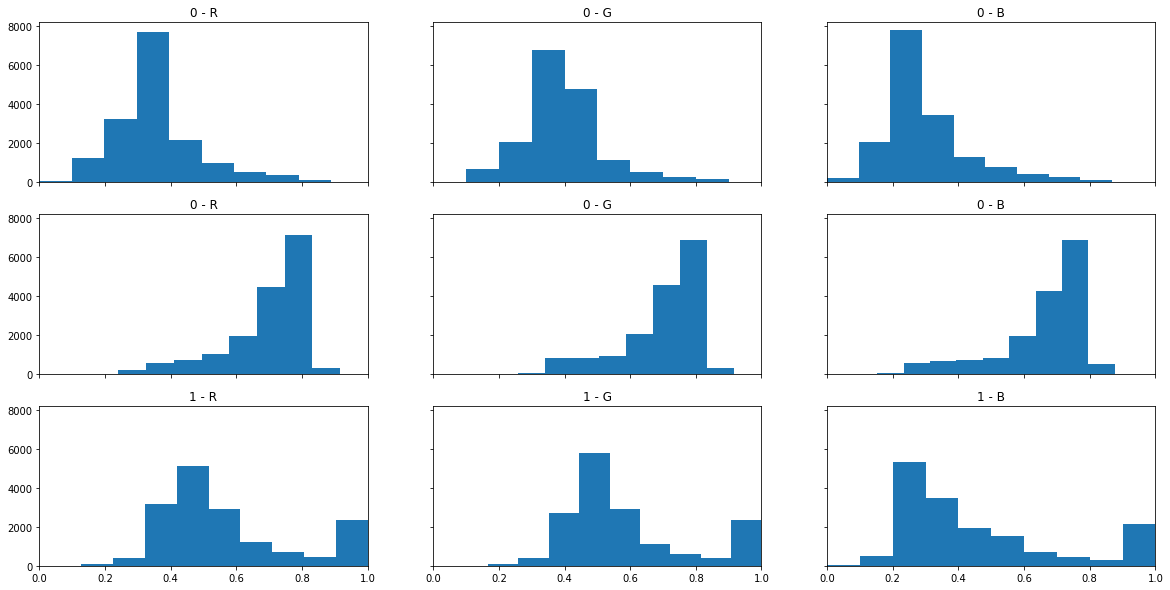

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(20,10))

ax[0,0].set_xlim(0,1)

i = 0

for image, label in train_ds.take(3):
    ax[i,0].hist(image[:,:,0].numpy().flatten())
    ax[i,0].set_title('{} - {}'.format(label.numpy(), 'R'))
    ax[i,1].hist(image[:,:,1].numpy().flatten())
    ax[i,1].set_title('{} - {}'.format(label.numpy(), 'G'))
    ax[i,2].hist(image[:,:,2].numpy().flatten())
    ax[i,2].set_title('{} - {}'.format(label.numpy(), 'B'))
    
    i = i+1

In [ ]:
BATCH_SIZE = 32

train_batches_ds = train_ds.batch(BATCH_SIZE)
val_batches_ds = val_ds.batch(BATCH_SIZE)
test_batches_ds = test_ds.batch(BATCH_SIZE)

In [ ]:
for image_batch, label_batch in train_batches_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

In [ ]:
IMG_SHAPE = (128, 128, 3)

# create the base model from the pre-trained model VGG16
# note that, if using a Kaggle server, internet has to be turned on
vgg_model = tf.keras.applications.vgg16.VGG16(input_shape=IMG_SHAPE,
                                                     include_top=False,
                                                     weights='imagenet')

# freeze the convolutional base
vgg_model.trainable = False

In [ ]:
feature_batch = vgg_model(image_batch)
print(feature_batch.shape)

In [ ]:
vgg_model.summary()

In [ ]:
# 512 elemanlı vector ımages
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

feature_batch_average = global_average_layer(feature_batch) # feature_batch_size:(32, 4, 4, 512) pooling ile (32,512) boyutunda vektörleştirilir.
print(feature_batch_average.shape) 

In [ ]:
# set the initializers with a seed for reproducible behaviour Tek bir tahmin i.in dense layer
prediction_layer = tf.keras.layers.Dense(1,
                                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1992),
                                         bias_initializer=tf.keras.initializers.GlorotUniform(seed=1992))

prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
model = tf.keras.Sequential([vgg_model,
                             global_average_layer,
                             prediction_layer])

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
initial_epochs = 20
steps_per_epoch = n_train//BATCH_SIZE
validation_steps = 20

loss0, accuracy0 = model.evaluate(val_batches_ds, steps=validation_steps) 

20/20 [==============================] - 18s 220ms/step - loss: 0.3247 - accuracy: 0.8750


In [ ]:
history = model.fit(train_batches_ds,
                    epochs=initial_epochs,
                    validation_data=val_batches_ds,
                    validation_steps=validation_steps)

Epoch 1/15
1250/1250 [==============================] - 280s 169ms/step - loss: 0.3046 - accuracy: 0.8687 - val_loss: 0.3176 - val_accuracy: 0.8734
Epoch 2/15
1250/1250 [==============================] - 279s 169ms/step - loss: 0.3018 - accuracy: 0.8702 - val_loss: 0.3042 - val_accuracy: 0.8703
Epoch 3/15
1250/1250 [==============================] - 281s 169ms/step - loss: 0.2997 - accuracy: 0.8712 - val_loss: 0.3245 - val_accuracy: 0.8703
Epoch 4/15
1250/1250 [==============================] - 281s 170ms/step - loss: 0.2975 - accuracy: 0.8717 - val_loss: 0.3265 - val_accuracy: 0.8531
Epoch 5/15
1250/1250 [==============================] - 280s 169ms/step - loss: 0.2950 - accuracy: 0.8730 - val_loss: 0.3150 - val_accuracy: 0.8625
Epoch 6/15
1250/1250 [==============================] - 282s 170ms/step - loss: 0.2925 - accuracy: 0.8736 - val_loss: 0.3351 - val_accuracy: 0.8625
Epoch 7/15
1250/1250 [==============================] - 280s 169ms/step - loss: 0.2917 - accuracy: 0.8737 - val_

In [ ]:
model.evaluate(test_batches_ds)

63/63 [==============================] - 20s 310ms/step - loss: 0.3883 - accuracy: 0.9261 - recall: 0.8480


[0.38825908303260803, 0.9261999752044678, 0.8479999899864197]

In [1]:
from prettytable import PrettyTable

table=PrettyTable(["model", "Train_accuracy","validation_accuracy", "Test_accuracy" ])
table.add_row(["VGG model","0.91 ",'0.90','0.92'])
print(table)

+-----------+----------------+---------------------+---------------+
|   model   | Train_accuracy | validation_accuracy | Test_accuracy |
+-----------+----------------+---------------------+---------------+
| VGG model |     0.91       |         0.90        |      0.92     |
+-----------+----------------+---------------------+---------------+
